In [54]:
class K_Means:

    def __init__(self, k =2, tolerance = 0.0001, max_iterations = 3):
        '''
        K: number of cluster we want from input datas
        tolerance: When the difference between the old and new centroids is less than the tolerance value, we stop the iterations.
        max_iteration: maxium amount of iteration process
        '''
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations
        
    def fit(self,data):
        
        np.random.shuffle(data)
        self.centroids = {}
        # init centroid
        for i in range(self.k):
            self.centroids[i] = data[i]
        # start iterations
        for i in range(self.max_iterations):
            print("Iter centroid: ", self.centroids)
            self.clusters = {}
            for i in range(self.k):
                self.clusters[i] = []
                
            for features in data:
                distances = [np.linalg.norm(features-self.centroids[centroid]) for centroid in self.centroids]
                result_cluster = distances.index(min(distances))
                self.clusters[result_cluster].append(features)
            print(self.clusters)
            # save previous centroids to check centroids changes
            prev_centroids = dict(self.centroids)
            
            # update to new centroids
            for cluster in self.clusters:
                self.centroids[cluster] = np.average(self.clusters[cluster],axis=0)
            
            optimized = True
            # if centroids changes more than tolerance, we keep iterative process
            for centroid in self.centroids:
                original_centroid = prev_centroids[centroid]
                current_centroid = self.centroids[centroid]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tolerance:
                    print("within-cluster sum of squared error: ", np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False
                    
            # otherwise, break out loop
            if optimized:
                break
    
    def predict(self, data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        result_cluster = distances.index(min(distances))
        
        return result_cluster
    

1. Know number of cluster in given dataset: <br>
Normally the number of cluster (k) is given as part of user input.
2. Randomly select K point in dataset to start as initial centroids <br>
In the program example, we just choice first K point as initial centroid.
3. Calculate distance of all other point (featuresets) to centroids <br>
4. The formula of choose centroids that minimize the within-cluster sum of squared can be given as: <br>
\begin{equation}\sum_{i=0}^{N}\min_{\mu_c \in C}(||x_i - \mu_c||^2) \end{equation} 
where $N$ is total number of sample in $X$, $x_i$ is one the sample in $X$, $u_c$ is centroids also mean of samples in each cluster.
5. New cluster is formed, we take mean of each cluster (mean of all point in each cluster), making that mean to be the new centroid for new cluster. <br>
5. Repeat step 3-5 until cluster optimized (centroids no longer moving)<br>


In [9]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [1.3, 1.5],
              [1.4,2.3],
              [8, 8],
              [1, 0.6],
              [9,11]])
X_extra = np.array([[1, 6],
              [1.5, 8],
              [1.3, 5],
              [1.4,3],
              [6, 8],
              [10, 4],
              [9,4]])
colors = 10*["g","r","c","b","k"]

Iter centroid:  {0: array([1., 2.]), 1: array([1. , 0.6])}
{0: [array([1., 2.]), array([1.4, 2.3]), array([ 9., 11.]), array([1.3, 1.5]), array([8., 8.]), array([1.5, 1.8]), array([5., 8.])], 1: [array([1. , 0.6])]}
within-cluster sum of squared error:  435.7142857142858
Iter centroid:  {0: array([3.88571429, 4.94285714]), 1: array([1. , 0.6])}
{0: [array([ 9., 11.]), array([8., 8.]), array([5., 8.])], 1: [array([1., 2.]), array([1. , 0.6]), array([1.4, 2.3]), array([1.3, 1.5]), array([1.5, 1.8])]}
within-cluster sum of squared error:  170.80641505156973
within-cluster sum of squared error:  197.33333333333334
Iter centroid:  {0: array([7.33333333, 9.        ]), 1: array([1.24, 1.64])}
{0: [array([ 9., 11.]), array([8., 8.]), array([5., 8.])], 1: [array([1., 2.]), array([1. , 0.6]), array([1.4, 2.3]), array([1.3, 1.5]), array([1.5, 1.8])]}


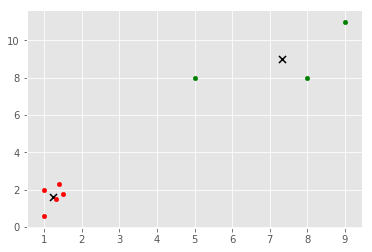

In [81]:
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="x", color="k", s=50)

for cluster in clf.clusters:
    color = colors[cluster]
    for sample in clf.clusters[cluster]:
        plt.scatter(sample[0], sample[1], marker="o", color=color, s=20)
        
plt.show()

In [11]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=2)
clf.fit(X)

X_dist = clf.transform(X_extra)
print(X_dist)

centroids = clf.cluster_centers_
labels = clf.labels_


[[4.36660051 7.00793201]
 [6.36531225 5.91842697]
 [3.36053567 7.23886118]
 [1.36937942 8.4382726 ]
 [7.94400403 1.66666667]
 [9.07233156 5.66666667]
 [8.1109309  5.27046277]]


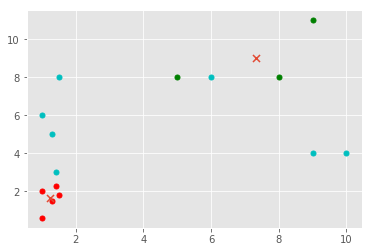

[[ 1.   2. ]
 [ 1.5  1.8]
 [ 5.   8. ]
 [ 1.3  1.5]
 [ 1.4  2.3]
 [ 8.   8. ]
 [ 1.   0.6]
 [ 9.  11. ]]
[1 1 0 1 1 0 1 0]


In [10]:
colors = ["g.","r.","c.","y."]
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
for i in range(len(X_extra)):
    plt.plot(X_extra[i][0], X_extra[i][1], colors[2], markersize = 10)
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=50, linewidths = 5, zorder = 10)
plt.show()
print(X)
print(labels)